<a href="https://colab.research.google.com/github/jeki15/classification-churn-prediction/blob/main/final_project_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_customer=pd.read_csv('/content/drive/MyDrive/customer.csv')
df_transaksi=pd.read_csv('/content/drive/MyDrive/transactions.csv')
df_product=pd.read_csv('/content/drive/MyDrive/product.csv', on_bad_lines='skip')

In [ ]:
df_customer.head(10)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30
6,90319,Banara,Wijaya,79c0c343-3ef3-4862-8f4d-591dbd9a8870,79c0c343_3ef3_4862_8f4d_591dbd9a8870@zakyfound...,M,1990-01-12,Android,4c110df9-59b6-471d-87eb-fd45c0f2868d,Android 8.1.0,0.869352,103.873668,Kepulauan Riau,Indonesia,2019-12-14
7,96453,Talia,Hastuti,44e67d0f-4743-479c-a74b-fc853ea5b355,44e67d0f_4743_479c_a74b_fc853ea5b355@startupca...,F,2005-02-12,Android,eba4a196-7133-4da6-a2b4-d153541edc5b,Android 4.2,-3.908257,102.486909,Bengkulu,Indonesia,2022-01-09
8,8031,Ana,Laksmiwati,c5969dbf-c32b-428c-b8f4-a430def3befd,c5969dbf_c32b_428c_b8f4_a430def3befd@zakyfound...,F,1995-11-01,iOS,17545c14-a543-43ab-8e30-f9195f0336f0,iPad; CPU iPad OS 10_3_3 like Mac OS X,-6.974594,107.634488,Jawa Barat,Indonesia,2019-09-12
9,61533,Adiarja,Utama,57497894-0738-4bcd-8839-f56cfc179ebc,57497894_0738_4bcd_8839_f56cfc179ebc@startupca...,M,1987-02-28,Android,95a24899-f5f1-433e-ac5d-4f8b28c7ca39,Android 4.0.1,-8.386214,120.665656,Nusa Tenggara Timur,Indonesia,2020-01-27


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
df_transaksi.head(10)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,"[{'product_id': 59620, 'quantity': 1, 'item_pr...",Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,"[{'product_id': 53136, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,-7.712608,110.502877,306599
7,2019-05-08T11:29:21.365620Z,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,"[{'product_id': 14142, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-05-10T20:09:58.104955Z,3.293114,98.857043,153913
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,"[{'product_id': 12282, 'quantity': 1, 'item_pr...",Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,"[{'product_id': 53051, 'quantity': 1, 'item_pr...",Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740


In [ ]:
df_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df_product.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
df_click.isnull().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [ ]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


**Handle missing value**

In [ ]:
df_transaksi.promo_code.fillna('No Promo', inplace=True)

In [ ]:
df_product.baseColour.fillna(df_product.baseColour.mode()[0], inplace=True)

In [ ]:
df_product.season.fillna(df_product.season.mode()[0], inplace=True)

In [ ]:
df_product.usage.fillna(df_product.usage.mode()[0], inplace=True)

In [ ]:
df_product=df_product.dropna()

**INSIGHT**

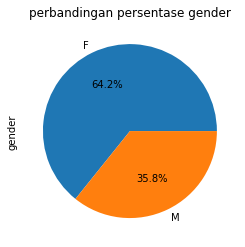

In [ ]:
df_customer.gender.value_counts().plot.pie(autopct='%1.1f%%', title='perbandingan persentase gender')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from datetime import datetime
now=pd.Timestamp.now()
df_customer.birthdate=pd.to_datetime(df_customer.birthdate)
df_customer['umur']=now.year-df_customer.birthdate.dt.year
pd.options.display.max_rows=1000
df_umur=df_customer.groupby('umur')['umur'].count()
print(df_umur)
print('\n\nSTATISTIKA DESKRIPTIF UMUR\n')
print(df_customer.umur.describe())
print('\ninsight: \nRata-Rata umur customer berada pada usia 25 tahun')

umur
6        4
7        9
8       23
9       60
10     110
11     265
12     465
13     780
14    1139
15    1582
16    2128
17    2755
18    3366
19    3962
20    4532
21    4838
22    5292
23    5436
24    5653
25    5547
26    5455
27    5283
28    5355
29    4695
30    4186
31    3968
32    3474
33    3022
34    2743
35    2431
36    2026
37    1763
38    1556
39    1171
40    1005
41     745
42     657
43     513
44     436
45     342
46     281
47     223
48     174
49     148
50     115
51      68
52      50
53      40
54      40
55      23
56      15
57      12
58       9
59       8
60       7
61       3
62       3
63       1
64       1
65       2
67       4
68       1
Name: umur, dtype: int64


STATISTIKA DESKRIPTIF UMUR

count    100000.000000
mean         26.516130
std           7.275733
min           6.000000
25%          21.000000
50%          26.000000
75%          31.000000
max          68.000000
Name: umur, dtype: float64

insight: 
Rata-Rata umur customer berada pada 

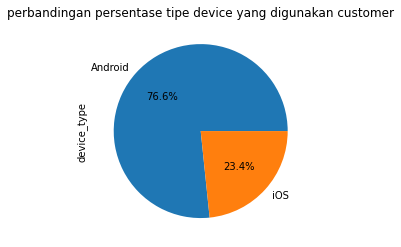

In [ ]:
df_customer.device_type.value_counts().plot.pie(autopct='%1.1f%%', title='perbandingan persentase tipe device yang digunakan customer')

In [ ]:
print('STATISTIKA DESKRIPTIF\n')
print(df_customer.home_location.value_counts())
print('\ninsight: \nCustomer didominasi ')

STATISTIKA DESKRIPTIF

Jakarta Raya           18715
Jawa Barat             11486
Jawa Tengah            10960
Jawa Timur              9953
Yogyakarta              7849
Kalimantan Barat        5603
Lampung                 5426
Kalimantan Selatan      4229
Kalimantan Tengah       4091
Kalimantan Timur        2729
Maluku                  2490
Kepulauan Riau          1902
Bali                    1451
Sumatera Barat          1346
Nusa Tenggara Barat     1324
Sulawesi Utara          1279
Sulawesi Barat          1068
Sumatera Utara          1004
Sumatera Selatan         841
Papua                    753
Sulawesi Selatan         726
Papua Barat              660
Bengkulu                 654
Nusa Tenggara Timur      587
Sulawesi Tengah          505
Jambi                    385
Banten                   377
Maluku Utara             368
Gorontalo                348
Aceh                     263
Bangka Belitung          250
Sulawesi Tenggara        246
Riau                     132
Name: home_location,

Text(0.5, 0, 'metode pembayaran')

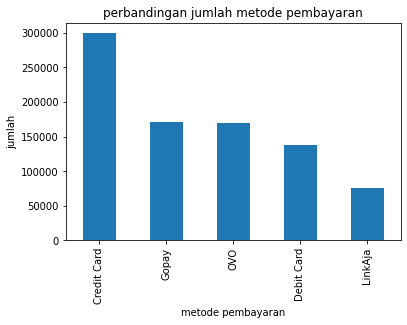

In [ ]:
plot1=df_transaksi.payment_method.value_counts().plot(kind='bar', title='perbandingan jumlah metode pembayaran')
plot1.set_ylabel('jumlah')
plot1.set_xlabel('metode pembayaran')

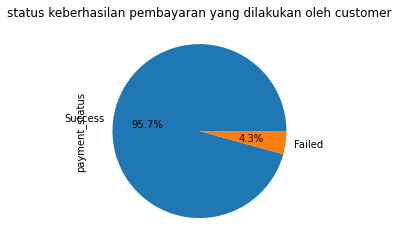

In [ ]:
df_transaksi.payment_status.value_counts().plot.pie(autopct='%1.1f%%', title='status keberhasilan pembayaran yang dilakukan oleh customer')

In [ ]:
df_transaksi.promo_amount.describe()

count    852584.000000
mean       2042.077949
std        3063.481424
min           0.000000
25%           0.000000
50%           0.000000
75%        3993.000000
max       24519.000000
Name: promo_amount, dtype: float64

Text(0, 0.5, 'jumlah')

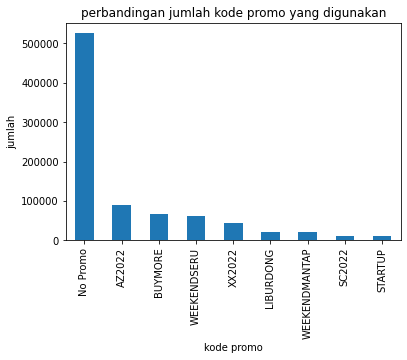

In [ ]:
plot2=df_transaksi.promo_code.value_counts().plot(kind='bar', title='perbandingan jumlah kode promo yang digunakan')
plot2.set_xlabel('kode promo')
plot2.set_ylabel('jumlah')

In [ ]:
df_transaksi.total_amount.describe()

count    8.525840e+05
mean     5.499165e+05
std      8.153761e+05
min      1.089800e+04
25%      2.037938e+05
50%      3.029890e+05
75%      5.147022e+05
max      2.350449e+07
Name: total_amount, dtype: float64

Text(0, 0.5, 'jumlah')

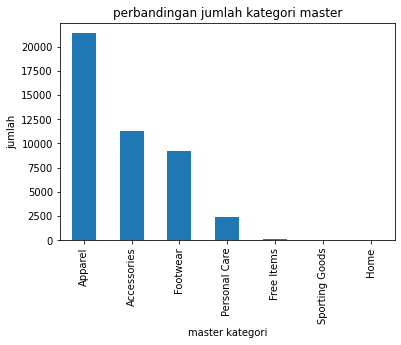

In [ ]:
plot3=df_product.masterCategory.value_counts().plot(kind='bar', title='perbandingan jumlah kategori master')
plot3.set_xlabel('master kategori')
plot3.set_ylabel('jumlah')

In [ ]:
print('STATISTIKA DESKRIPTIF')
print(df_product.subCategory.value_counts())
print('\n\nInsight: \nTopwear menjadi top seller')

STATISTIKA DESKRIPTIF
Topwear                     15401
Shoes                        7343
Bags                         3053
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1006
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                 

In [ ]:
print('STATISTIKA DESKRIPTIF')
print(df_product.articleType.value_counts())
print('\n\nInsight: \nTshirts menjadi top seller')

STATISTIKA DESKRIPTIF
Tshirts                      7066
Shirts                       3217
Casual Shoes                 2845
Watches                      2542
Sports Shoes                 2036
Kurtas                       1844
Tops                         1762
Handbags                     1759
Heels                        1323
Sunglasses                   1073
Wallets                       936
Flip Flops                    914
Sandals                       897
Briefs                        849
Belts                         813
Backpacks                     724
Socks                         686
Formal Shoes                  637
Jeans                         609
Perfume and Body Mist         608
Shorts                        547
Trousers                      530
Flats                         500
Bra                           477
Dresses                       464
Sarees                        427
Earrings                      416
Deodorant                     347
Nail Polish               

In [ ]:
print('STATISTIKA DESKRIPTIF')
print(df_product.baseColour.value_counts())
print('\n\nInsight: \nBlack menjadi warna favorit customers')

STATISTIKA DESKRIPTIF
Black                9738
White                5538
Blue                 4917
Brown                3493
Grey                 2741
Red                  2455
Green                2115
Pink                 1860
Navy Blue            1789
Purple               1640
Silver               1090
Yellow                778
Beige                 749
Gold                  628
Maroon                580
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown    

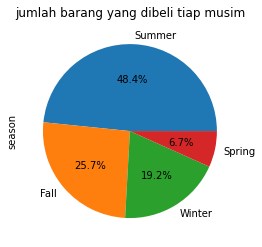

In [ ]:
df_product.season.value_counts().plot.pie(autopct='%1.1f%%', title='jumlah barang yang dibeli tiap musim')

Text(0, 0.5, 'jumlah')

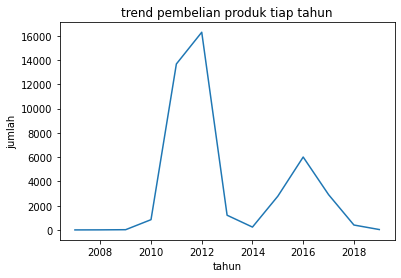

In [ ]:
plot4=df_product.groupby('year')['year'].count().plot(kind='line', title='trend pembelian produk tiap tahun')
plot4.set_xlabel('tahun')
plot4.set_ylabel('jumlah')

Text(0, 0.5, 'jumlah')

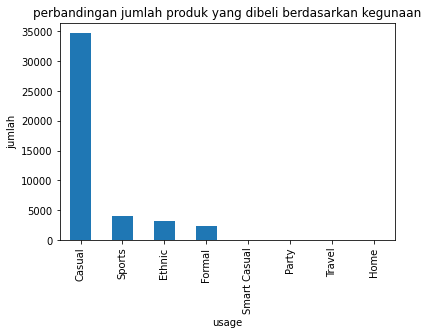

In [ ]:
plot5=df_product.usage.value_counts().plot(kind='bar', title='perbandingan jumlah produk yang dibeli berdasarkan kegunaan')
plot5.set_xlabel('usage')
plot5.set_ylabel('jumlah')

Text(0, 0.5, 'jummlah')

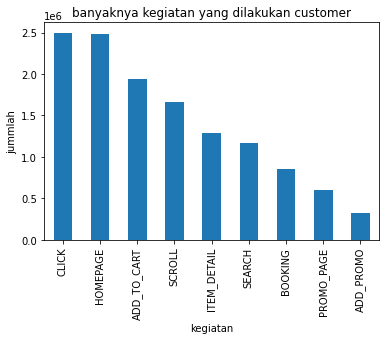

In [ ]:
plot6=df_click.event_name.value_counts().plot(kind='bar', title='banyaknya kegiatan yang dilakukan customer')
plot6.set_xlabel('kegiatan')
plot6.set_ylabel('jummlah')

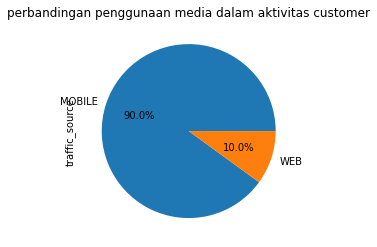

In [ ]:
df_click.traffic_source.value_counts().plot(kind='pie',
                                            autopct='%1.1f%%',
                                            title='perbandingan penggunaan media dalam aktivitas customer')

In [ ]:
from ast import literal_eval
df_transaksi.product_metadata=df_transaksi.product_metadata.fillna('{}')
df_transaksi.product_metadata=df_transaksi.product_metadata.apply(lambda x: literal_eval(str(x)))
df_transaksi=df_transaksi.explode('product_metadata').reset_index(drop=True)
df_transaksi=pd.concat([df_transaksi.drop(['product_metadata'], axis=1), pd.json_normalize(df_transaksi['product_metadata'])], axis=1)

**MERGE DATA**

In [ ]:
df_temp=df_customer.merge(df_transaksi, how='left', on='customer_id')
df_temp1=df_temp.merge(df_product, how='left', left_on='product_id', right_on='id')
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 41 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   customer_id             1303880 non-null  int64         
 1   first_name              1303880 non-null  object        
 2   last_name               1303880 non-null  object        
 3   username                1303880 non-null  object        
 4   email                   1303880 non-null  object        
 5   gender_x                1303880 non-null  object        
 6   birthdate               1303880 non-null  datetime64[ns]
 7   device_type             1303880 non-null  object        
 8   device_id               1303880 non-null  object        
 9   device_version          1303880 non-null  object        
 10  home_location_lat       1303880 non-null  float64       
 11  home_location_long      1303880 non-null  float64       
 12  home_location 

In [ ]:
df_temp1.rename(columns={'gender_x':'gender'}, inplace=True)

In [ ]:
df_temp1.iloc[:,:20]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,umur,created_at,booking_id,session_id,payment_method
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,NaN,NaN,NaN,NaN
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,2020-08-23T12:53:12.916342Z,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,2020-08-23T12:53:12.916342Z,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,2020-08-31T13:34:59.916342Z,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,LinkAja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,35,2021-12-07T17:31:02.139547Z,6324e721-b59b-4c8b-9570-5ad30112be1e,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,Credit Card
1303876,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,35,2022-01-23T19:01:48.139547Z,65367fff-1522-4c80-a0f7-1306676bd947,4bb58af9-b2df-4c48-bcb7-d68749625cee,Credit Card
1303877,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,35,2022-03-11T19:03:09.139547Z,7df40e00-5e2c-40c5-99f7-0e451ca82de4,a9c839a8-f945-4edb-b262-1d9196e2f827,Credit Card
1303878,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,35,2022-04-27T20:00:55.139547Z,ae2b3e5b-0053-4671-ae18-f5a60b8a14dd,fcbf4865-4006-4bab-b9ca-3c0c0241c23d,Credit Card


In [ ]:
df_temp1.iloc[:,20:40]

,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,id,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,18015.0,1.0,305982.0,18015.0,Women,Accessories,Belts,Belts,Brown,Winter,2015.0,Casual
3,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,2401.0,2.0,263311.0,2401.0,Men,Apparel,Topwear,Tshirts,White,Fall,2010.0,Sports
4,Success,0.0,No Promo,10000.0,2020-09-04T05:49:01.977704Z,-6.281795,106.890417,391341.0,12449.0,1.0,381341.0,12449.0,Unisex,Accessories,Shoe Accessories,Shoe Accessories,Brown,Fall,2011.0,Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,Failed,0.0,No Promo,10000.0,2021-12-12T14:09:32.839861Z,-3.992617,131.221877,1200173.0,19124.0,1.0,106826.0,19124.0,Women,Footwear,Flip Flops,Flip Flops,Pink,Fall,2011.0,Casual
1303876,Success,4532.0,WEEKENDSERU,10000.0,2022-01-26T01:41:11.712735Z,-6.286999,106.838482,110483.0,42935.0,1.0,105015.0,42935.0,Men,Accessories,Bags,Handbags,Khaki,Summer,2012.0,Casual
1303877,Success,0.0,No Promo,25000.0,2022-03-14T02:16:33.321801Z,0.583145,113.530523,276290.0,54808.0,1.0,251290.0,54808.0,Women,Accessories,Bags,Handbags,Brown,Summer,2010.0,Casual
1303878,Success,0.0,No Promo,10000.0,2022-04-29T06:40:10.012855Z,-7.819493,110.699877,258774.0,7158.0,1.0,248774.0,7158.0,Men,Apparel,Topwear,Shirts,Green,Fall,2011.0,Casual


In [ ]:
# lama_pengguna
df_temp1['first_join_date']=pd.to_datetime(df_temp1.first_join_date)
df_lama=df_temp1.groupby('customer_id')['first_join_date'].max()
df_lama=df_lama.to_frame()
df_lama.columns=['first_join_date']
df_lama['lama_pengguna']=now-df_lama.first_join_date
df_lama['lama_pengguna']=df_lama.lama_pengguna.dt.days
df_lama

,first_join_date,lama_pengguna
customer_id,,
1,2016-11-27,2188
2,2021-12-25,334
3,2018-08-25,1552
4,2021-03-22,612
5,2021-12-18,341
...,...,...
99996,2022-04-13,225
99997,2020-04-25,943
99998,2018-07-01,1607


In [ ]:
# promo_amount
df_promo=df_temp1.groupby('customer_id')['promo_amount'].sum()
df_promo=df_promo.to_frame()
df_promo

,promo_amount
customer_id,
1,0.0
2,0.0
3,183397.0
4,0.0
5,0.0
...,...
99996,0.0
99997,0.0
99998,59635.0


In [ ]:
# shipment_fee
df_shipment=df_temp1.groupby('customer_id')['shipment_fee'].sum()
df_shipment=df_shipment.to_frame()
df_shipment

,shipment_fee
customer_id,
1,0.0
2,0.0
3,495000.0
4,0.0
5,0.0
...,...
99996,0.0
99997,10000.0
99998,215000.0


In [ ]:
# total_amount
df_total_amount=df_temp1.groupby('customer_id')['total_amount'].sum()
df_total_amount=df_total_amount.to_frame()
df_total_amount

,total_amount
customer_id,
1,0.0
2,0.0
3,45842098.0
4,0.0
5,0.0
...,...
99996,0.0
99997,226461.0
99998,70563417.0


In [ ]:
# transaksi_count
df_trans=df_temp1.groupby('customer_id')['product_id'].count()
df_trans=df_trans.to_frame()
df_trans.columns=['transaksi_count']
df_trans

,transaksi_count
customer_id,
1,0
2,0
3,71
4,0
5,0
...,...
99996,0
99997,1
99998,24


In [ ]:
# quantity
df_quantity=df_temp1.groupby('customer_id')['quantity'].sum()
df_quantity=df_quantity.to_frame()
df_quantity

,quantity
customer_id,
1,0.0
2,0.0
3,88.0
4,0.0
5,0.0
...,...
99996,0.0
99997,1.0
99998,33.0


In [ ]:
# item_price
df_item_price=df_temp1.groupby('customer_id')['item_price'].sum()
df_item_price=df_item_price.to_frame()
df_item_price

,item_price
customer_id,
1,0.0
2,0.0
3,17068470.0
4,0.0
5,0.0
...,...
99996,0.0
99997,216461.0
99998,5488220.0


In [ ]:
df_item_price.describe()

,item_price
count,1.000000e+05
mean,3.136142e+06
std,8.455470e+06
min,0.000000e+00
25%,0.000000e+00
50%,1.160645e+05
75%,2.174512e+06
max,2.048702e+08


In [ ]:
df_temp1['nama_produk']=df_temp1.productDisplayName.str.split('Men').str.get(0).str.split('Women').str.get(0)

In [ ]:
# is_churn
df_temp1['created_at']=pd.to_datetime(df_temp1.created_at)
df_churn=df_temp1.groupby('customer_id')['created_at'].max()
df_churn=df_churn.to_frame()
now.utc=pd.Timestamp.now(tz='UTC')
df_churn['waktu_aktif']=now.utc-df_churn.created_at
df_churn['waktu_aktif']=df_churn.waktu_aktif.dt.days
def churn(x):
    if x>365:
        return True
    else: return False
df_churn['is_churn']=df_churn.waktu_aktif.apply(lambda x: churn(x))
df_churn.dropna()

,created_at,waktu_aktif,is_churn
customer_id,,,
3,2022-06-26 15:41:52.844494+00:00,150.0,False
8,2022-05-15 22:46:22.656991+00:00,192.0,False
9,2022-05-28 08:44:32.421034+00:00,180.0,False
11,2022-03-07 14:29:13.759159+00:00,261.0,False
15,2022-01-05 06:07:58.105040+00:00,323.0,False
...,...,...,...
99992,2022-05-25 09:32:49.873510+00:00,183.0,False
99995,2022-07-29 03:54:17.810263+00:00,118.0,False
99997,2020-04-25 18:38:16.825127+00:00,942.0,True


In [ ]:
df_temp2=df_temp1.drop(df_temp1.columns[[1,2,3,4,6,8,9,10,11,13,14,17,18,21,23,24,25,26,27,28,29,30,31,32,40]], axis=1)
df_temp2=df_temp2.sort_values('created_at').groupby('customer_id').tail(1).reset_index(drop=True)
df_temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   customer_id     100000 non-null  int64              
 1   gender          100000 non-null  object             
 2   device_type     100000 non-null  object             
 3   home_location   100000 non-null  object             
 4   umur            100000 non-null  int64              
 5   created_at      50705 non-null   datetime64[ns, UTC]
 6   payment_method  50705 non-null   object             
 7   payment_status  50705 non-null   object             
 8   promo_code      50705 non-null   object             
 9   masterCategory  50672 non-null   object             
 10  subCategory     50672 non-null   object             
 11  articleType     50672 non-null   object             
 12  baseColour      50672 non-null   object             
 13  season         

In [ ]:
# merge
df_model=df_temp2.merge(df_lama['lama_pengguna'], how='left', on='customer_id')
df_model=df_model.merge(df_promo, how='left', on='customer_id')
df_model=df_model.merge(df_shipment, how='left', on='customer_id')
df_model=df_model.merge(df_total_amount, how='left', on='customer_id')
df_model=df_model.merge(df_trans, how='left', on='customer_id')
df_model=df_model.merge(df_quantity, how='left', on='customer_id')
df_model=df_model.merge(df_item_price, how='left', on='customer_id')
df_model=df_model.merge(df_churn['is_churn'], how='left', on='customer_id')
df_model.drop(columns=['created_at'], inplace=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      100000 non-null  int64  
 1   gender           100000 non-null  object 
 2   device_type      100000 non-null  object 
 3   home_location    100000 non-null  object 
 4   umur             100000 non-null  int64  
 5   payment_method   50705 non-null   object 
 6   payment_status   50705 non-null   object 
 7   promo_code       50705 non-null   object 
 8   masterCategory   50672 non-null   object 
 9   subCategory      50672 non-null   object 
 10  articleType      50672 non-null   object 
 11  baseColour       50672 non-null   object 
 12  season           50672 non-null   object 
 13  year             50672 non-null   float64
 14  usage            50672 non-null   object 
 15  nama_produk      50672 non-null   object 
 16  lama_pengguna    100000 non-null  int64

In [ ]:
df_model=df_model.dropna().reset_index(drop=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50672 entries, 0 to 50671
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      50672 non-null  int64  
 1   gender           50672 non-null  object 
 2   device_type      50672 non-null  object 
 3   home_location    50672 non-null  object 
 4   umur             50672 non-null  int64  
 5   payment_method   50672 non-null  object 
 6   payment_status   50672 non-null  object 
 7   promo_code       50672 non-null  object 
 8   masterCategory   50672 non-null  object 
 9   subCategory      50672 non-null  object 
 10  articleType      50672 non-null  object 
 11  baseColour       50672 non-null  object 
 12  season           50672 non-null  object 
 13  year             50672 non-null  float64
 14  usage            50672 non-null  object 
 15  nama_produk      50672 non-null  object 
 16  lama_pengguna    50672 non-null  int64  
 17  promo_amount

In [ ]:
df_model.to_csv('model.csv', index=False)

In [ ]:
# mengubah kolom gender menjadi numerik
df_model=pd.concat([df_model, pd.get_dummies(df_model.gender, prefix='gender')], axis=1)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,lama_pengguna,promo_amount,shipment_fee,total_amount,transaksi_count,quantity,item_price,is_churn,gender_F,gender_M
0,73773,M,Android,Jawa Barat,31,Debit Card,Success,No Promo,Footwear,Flip Flops,...,2338,0.0,10000.0,256670.0,1,1.0,246670.0,True,0,1
1,30771,F,iOS,Maluku,17,Credit Card,Success,WEEKENDSERU,Apparel,Innerwear,...,2336,5272.0,5000.0,199897.0,1,1.0,200169.0,True,1,0
2,67563,F,Android,Jakarta Raya,14,Gopay,Success,No Promo,Accessories,Wallets,...,2335,0.0,10000.0,996610.0,1,3.0,328870.0,True,1,0
3,22844,F,Android,Jakarta Raya,29,Gopay,Success,AZ2022,Accessories,Accessories,...,2336,5952.0,10000.0,215548.0,1,1.0,211500.0,True,1,0
4,9914,M,iOS,Sumatera Utara,26,Credit Card,Success,AZ2022,Apparel,Loungewear and Nightwear,...,2334,6060.0,15000.0,336925.0,1,1.0,327985.0,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,Jawa Barat,35,Credit Card,Success,No Promo,Accessories,Bags,...,116,10454.0,110000.0,2349893.0,8,12.0,1490215.0,False,1,0
50668,27522,F,Android,Sumatera Selatan,33,Debit Card,Success,No Promo,Apparel,Topwear,...,116,11544.0,40000.0,1860982.0,4,4.0,763034.0,False,1,0
50669,81975,M,iOS,Jakarta Raya,20,Debit Card,Success,No Promo,Footwear,Sandal,...,116,69992.0,360000.0,57979708.0,57,101.0,14868733.0,False,0,1
50670,22285,F,iOS,Kalimantan Barat,24,LinkAja,Success,No Promo,Apparel,Innerwear,...,116,0.0,5000.0,155339.0,1,1.0,150339.0,False,1,0


In [ ]:
# mengubah kolom device_type menjadi numerik
df_model=pd.concat([df_model, pd.get_dummies(df_model.device_type, prefix='device_type')], axis=1)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,shipment_fee,total_amount,transaksi_count,quantity,item_price,is_churn,gender_F,gender_M,device_type_Android,device_type_iOS
0,73773,M,Android,Jawa Barat,31,Debit Card,Success,No Promo,Footwear,Flip Flops,...,10000.0,256670.0,1,1.0,246670.0,True,0,1,1,0
1,30771,F,iOS,Maluku,17,Credit Card,Success,WEEKENDSERU,Apparel,Innerwear,...,5000.0,199897.0,1,1.0,200169.0,True,1,0,0,1
2,67563,F,Android,Jakarta Raya,14,Gopay,Success,No Promo,Accessories,Wallets,...,10000.0,996610.0,1,3.0,328870.0,True,1,0,1,0
3,22844,F,Android,Jakarta Raya,29,Gopay,Success,AZ2022,Accessories,Accessories,...,10000.0,215548.0,1,1.0,211500.0,True,1,0,1,0
4,9914,M,iOS,Sumatera Utara,26,Credit Card,Success,AZ2022,Apparel,Loungewear and Nightwear,...,15000.0,336925.0,1,1.0,327985.0,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,Jawa Barat,35,Credit Card,Success,No Promo,Accessories,Bags,...,110000.0,2349893.0,8,12.0,1490215.0,False,1,0,1,0
50668,27522,F,Android,Sumatera Selatan,33,Debit Card,Success,No Promo,Apparel,Topwear,...,40000.0,1860982.0,4,4.0,763034.0,False,1,0,1,0
50669,81975,M,iOS,Jakarta Raya,20,Debit Card,Success,No Promo,Footwear,Sandal,...,360000.0,57979708.0,57,101.0,14868733.0,False,0,1,0,1
50670,22285,F,iOS,Kalimantan Barat,24,LinkAja,Success,No Promo,Apparel,Innerwear,...,5000.0,155339.0,1,1.0,150339.0,False,1,0,0,1


In [ ]:
# mengubah kolom home_location menjadi numerik
from sklearn.preprocessing import LabelEncoder
df_model['home_location']=LabelEncoder().fit_transform(df_model.home_location)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,shipment_fee,total_amount,transaksi_count,quantity,item_price,is_churn,gender_F,gender_M,device_type_Android,device_type_iOS
0,73773,M,Android,8,31,Debit Card,Success,No Promo,Footwear,Flip Flops,...,10000.0,256670.0,1,1.0,246670.0,True,0,1,1,0
1,30771,F,iOS,17,17,Credit Card,Success,WEEKENDSERU,Apparel,Innerwear,...,5000.0,199897.0,1,1.0,200169.0,True,1,0,0,1
2,67563,F,Android,6,14,Gopay,Success,No Promo,Accessories,Wallets,...,10000.0,996610.0,1,3.0,328870.0,True,1,0,1,0
3,22844,F,Android,6,29,Gopay,Success,AZ2022,Accessories,Accessories,...,10000.0,215548.0,1,1.0,211500.0,True,1,0,1,0
4,9914,M,iOS,31,26,Credit Card,Success,AZ2022,Apparel,Loungewear and Nightwear,...,15000.0,336925.0,1,1.0,327985.0,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,No Promo,Accessories,Bags,...,110000.0,2349893.0,8,12.0,1490215.0,False,1,0,1,0
50668,27522,F,Android,30,33,Debit Card,Success,No Promo,Apparel,Topwear,...,40000.0,1860982.0,4,4.0,763034.0,False,1,0,1,0
50669,81975,M,iOS,6,20,Debit Card,Success,No Promo,Footwear,Sandal,...,360000.0,57979708.0,57,101.0,14868733.0,False,0,1,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,No Promo,Apparel,Innerwear,...,5000.0,155339.0,1,1.0,150339.0,False,1,0,0,1


In [ ]:
# mengubah kolom payment_method menjadi numerik
df_model=pd.concat([df_model, pd.get_dummies(df_model.payment_method, prefix='payment_method')], axis=1)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,is_churn,gender_F,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,73773,M,Android,8,31,Debit Card,Success,No Promo,Footwear,Flip Flops,...,True,0,1,1,0,0,1,0,0,0
1,30771,F,iOS,17,17,Credit Card,Success,WEEKENDSERU,Apparel,Innerwear,...,True,1,0,0,1,1,0,0,0,0
2,67563,F,Android,6,14,Gopay,Success,No Promo,Accessories,Wallets,...,True,1,0,1,0,0,0,1,0,0
3,22844,F,Android,6,29,Gopay,Success,AZ2022,Accessories,Accessories,...,True,1,0,1,0,0,0,1,0,0
4,9914,M,iOS,31,26,Credit Card,Success,AZ2022,Apparel,Loungewear and Nightwear,...,True,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,No Promo,Accessories,Bags,...,False,1,0,1,0,1,0,0,0,0
50668,27522,F,Android,30,33,Debit Card,Success,No Promo,Apparel,Topwear,...,False,1,0,1,0,0,1,0,0,0
50669,81975,M,iOS,6,20,Debit Card,Success,No Promo,Footwear,Sandal,...,False,0,1,0,1,0,1,0,0,0
50670,22285,F,iOS,11,24,LinkAja,Success,No Promo,Apparel,Innerwear,...,False,1,0,0,1,0,0,0,1,0


In [ ]:
# mengubah kolom payment_status menjadi numerik
df_model=pd.concat([df_model, pd.get_dummies(df_model.payment_status, prefix='payment_status')], axis=1)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,73773,M,Android,8,31,Debit Card,Success,No Promo,Footwear,Flip Flops,...,1,1,0,0,1,0,0,0,0,1
1,30771,F,iOS,17,17,Credit Card,Success,WEEKENDSERU,Apparel,Innerwear,...,0,0,1,1,0,0,0,0,0,1
2,67563,F,Android,6,14,Gopay,Success,No Promo,Accessories,Wallets,...,0,1,0,0,0,1,0,0,0,1
3,22844,F,Android,6,29,Gopay,Success,AZ2022,Accessories,Accessories,...,0,1,0,0,0,1,0,0,0,1
4,9914,M,iOS,31,26,Credit Card,Success,AZ2022,Apparel,Loungewear and Nightwear,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,No Promo,Accessories,Bags,...,0,1,0,1,0,0,0,0,0,1
50668,27522,F,Android,30,33,Debit Card,Success,No Promo,Apparel,Topwear,...,0,1,0,0,1,0,0,0,0,1
50669,81975,M,iOS,6,20,Debit Card,Success,No Promo,Footwear,Sandal,...,1,0,1,0,1,0,0,0,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,No Promo,Apparel,Innerwear,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom promo_code menjadi numerik
promo={'No Promo':0, 'AZ2022':8, 'WEEKENDSERU':7, 'BUYMORE':6, 'XX2022':5, 'LIBURDONG':4, 'WEEKENDMANTAP':3, 'STARTUP':2, 'SC2022':1}
df_model['promo_code']=df_model.promo_code.map(promo)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,73773,M,Android,8,31,Debit Card,Success,0,Footwear,Flip Flops,...,1,1,0,0,1,0,0,0,0,1
1,30771,F,iOS,17,17,Credit Card,Success,7,Apparel,Innerwear,...,0,0,1,1,0,0,0,0,0,1
2,67563,F,Android,6,14,Gopay,Success,0,Accessories,Wallets,...,0,1,0,0,0,1,0,0,0,1
3,22844,F,Android,6,29,Gopay,Success,8,Accessories,Accessories,...,0,1,0,0,0,1,0,0,0,1
4,9914,M,iOS,31,26,Credit Card,Success,8,Apparel,Loungewear and Nightwear,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,0,Accessories,Bags,...,0,1,0,1,0,0,0,0,0,1
50668,27522,F,Android,30,33,Debit Card,Success,0,Apparel,Topwear,...,0,1,0,0,1,0,0,0,0,1
50669,81975,M,iOS,6,20,Debit Card,Success,0,Footwear,Sandal,...,1,0,1,0,1,0,0,0,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,0,Apparel,Innerwear,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom masterCategory menjadi numerik
df_model['masterCategory']=LabelEncoder().fit_transform(df_model.masterCategory)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,73773,M,Android,8,31,Debit Card,Success,0,2,Flip Flops,...,1,1,0,0,1,0,0,0,0,1
1,30771,F,iOS,17,17,Credit Card,Success,7,1,Innerwear,...,0,0,1,1,0,0,0,0,0,1
2,67563,F,Android,6,14,Gopay,Success,0,0,Wallets,...,0,1,0,0,0,1,0,0,0,1
3,22844,F,Android,6,29,Gopay,Success,8,0,Accessories,...,0,1,0,0,0,1,0,0,0,1
4,9914,M,iOS,31,26,Credit Card,Success,8,1,Loungewear and Nightwear,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,0,0,Bags,...,0,1,0,1,0,0,0,0,0,1
50668,27522,F,Android,30,33,Debit Card,Success,0,1,Topwear,...,0,1,0,0,1,0,0,0,0,1
50669,81975,M,iOS,6,20,Debit Card,Success,0,2,Sandal,...,1,0,1,0,1,0,0,0,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,0,1,Innerwear,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom subCategory menjadi numerik
df_model['subCategory']=LabelEncoder().fit_transform(df_model.subCategory)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,73773,M,Android,8,31,Debit Card,Success,0,2,11,...,1,1,0,0,1,0,0,0,0,1
1,30771,F,iOS,17,17,Credit Card,Success,7,1,18,...,0,0,1,1,0,0,0,0,0,1
2,67563,F,Android,6,14,Gopay,Success,0,0,41,...,0,1,0,0,0,1,0,0,0,1
3,22844,F,Android,6,29,Gopay,Success,8,0,0,...,0,1,0,0,0,1,0,0,0,1
4,9914,M,iOS,31,26,Credit Card,Success,8,1,21,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,0,0,2,...,0,1,0,1,0,0,0,0,0,1
50668,27522,F,Android,30,33,Debit Card,Success,0,1,38,...,0,1,0,0,1,0,0,0,0,1
50669,81975,M,iOS,6,20,Debit Card,Success,0,2,26,...,1,0,1,0,1,0,0,0,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,0,1,18,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom articleType menjadi numerik
df_model['articleType']=LabelEncoder().fit_transform(df_model.articleType)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,73773,M,Android,8,31,Debit Card,Success,0,2,11,...,1,1,0,0,1,0,0,0,0,1
1,30771,F,iOS,17,17,Credit Card,Success,7,1,18,...,0,0,1,1,0,0,0,0,0,1
2,67563,F,Android,6,14,Gopay,Success,0,0,41,...,0,1,0,0,0,1,0,0,0,1
3,22844,F,Android,6,29,Gopay,Success,8,0,0,...,0,1,0,0,0,1,0,0,0,1
4,9914,M,iOS,31,26,Credit Card,Success,8,1,21,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,0,0,2,...,0,1,0,1,0,0,0,0,0,1
50668,27522,F,Android,30,33,Debit Card,Success,0,1,38,...,0,1,0,0,1,0,0,0,0,1
50669,81975,M,iOS,6,20,Debit Card,Success,0,2,26,...,1,0,1,0,1,0,0,0,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,0,1,18,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom baseColour menjadi numerik
df_model['baseColour']=LabelEncoder().fit_transform(df_model.baseColour)
df_model

,customer_id,gender,device_type,home_location,umur,payment_method,payment_status,promo_code,masterCategory,subCategory,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,73773,M,Android,8,31,Debit Card,Success,0,2,11,...,1,1,0,0,1,0,0,0,0,1
1,30771,F,iOS,17,17,Credit Card,Success,7,1,18,...,0,0,1,1,0,0,0,0,0,1
2,67563,F,Android,6,14,Gopay,Success,0,0,41,...,0,1,0,0,0,1,0,0,0,1
3,22844,F,Android,6,29,Gopay,Success,8,0,0,...,0,1,0,0,0,1,0,0,0,1
4,9914,M,iOS,31,26,Credit Card,Success,8,1,21,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,15753,F,Android,8,35,Credit Card,Success,0,0,2,...,0,1,0,1,0,0,0,0,0,1
50668,27522,F,Android,30,33,Debit Card,Success,0,1,38,...,0,1,0,0,1,0,0,0,0,1
50669,81975,M,iOS,6,20,Debit Card,Success,0,2,26,...,1,0,1,0,1,0,0,0,0,1
50670,22285,F,iOS,11,24,LinkAja,Success,0,1,18,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom season menjadi numerik
season={'Summer':3, 'Fall':2, 'Winter':1, 'Spring':0}
df_model['season']=df_model.season.map(season)
df_model.iloc[:,12:]

,season,year,usage,nama_produk,lama_pengguna,promo_amount,shipment_fee,total_amount,transaksi_count,quantity,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,2,2012.0,Casual,ADIDAS,2338,0.0,10000.0,256670.0,1,1.0,...,1,1,0,0,1,0,0,0,0,1
1,3,2016.0,Casual,Crusoe,2336,5272.0,5000.0,199897.0,1,1.0,...,0,0,1,1,0,0,0,0,0,1
2,3,2012.0,Casual,Baggit,2335,0.0,10000.0,996610.0,1,3.0,...,0,1,0,0,0,1,0,0,0,1
3,1,2015.0,Formal,Lino Perros,2336,5952.0,10000.0,215548.0,1,1.0,...,0,1,0,0,0,1,0,0,0,1
4,3,2017.0,Casual,SDL by Sweet Dreams,2334,6060.0,15000.0,336925.0,1,1.0,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,2,2011.0,Casual,ADIDAS Unisex BP Lspring Black Backpack,116,10454.0,110000.0,2349893.0,8,12.0,...,0,1,0,1,0,0,0,0,0,1
50668,3,2012.0,Casual,ADIDAS,116,11544.0,40000.0,1860982.0,4,4.0,...,0,1,0,0,1,0,0,0,0,1
50669,3,2016.0,Casual,Clarks,116,69992.0,360000.0,57979708.0,57,101.0,...,1,0,1,0,1,0,0,0,0,1
50670,3,2017.0,Casual,Jockey Essence Jane White T-shirt Bra 1243,116,0.0,5000.0,155339.0,1,1.0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom usage menjadi numerik
df_model['usage']=LabelEncoder().fit_transform(df_model.usage)
df_model.iloc[:,12:]

,season,year,usage,nama_produk,lama_pengguna,promo_amount,shipment_fee,total_amount,transaksi_count,quantity,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,2,2012.0,0,ADIDAS,2338,0.0,10000.0,256670.0,1,1.0,...,1,1,0,0,1,0,0,0,0,1
1,3,2016.0,0,Crusoe,2336,5272.0,5000.0,199897.0,1,1.0,...,0,0,1,1,0,0,0,0,0,1
2,3,2012.0,0,Baggit,2335,0.0,10000.0,996610.0,1,3.0,...,0,1,0,0,0,1,0,0,0,1
3,1,2015.0,2,Lino Perros,2336,5952.0,10000.0,215548.0,1,1.0,...,0,1,0,0,0,1,0,0,0,1
4,3,2017.0,0,SDL by Sweet Dreams,2334,6060.0,15000.0,336925.0,1,1.0,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,2,2011.0,0,ADIDAS Unisex BP Lspring Black Backpack,116,10454.0,110000.0,2349893.0,8,12.0,...,0,1,0,1,0,0,0,0,0,1
50668,3,2012.0,0,ADIDAS,116,11544.0,40000.0,1860982.0,4,4.0,...,0,1,0,0,1,0,0,0,0,1
50669,3,2016.0,0,Clarks,116,69992.0,360000.0,57979708.0,57,101.0,...,1,0,1,0,1,0,0,0,0,1
50670,3,2017.0,0,Jockey Essence Jane White T-shirt Bra 1243,116,0.0,5000.0,155339.0,1,1.0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom nama_produk menjadi numerik
df_model['nama_produk']=LabelEncoder().fit_transform(df_model.nama_produk)
df_model.iloc[:,12:]

,season,year,usage,nama_produk,lama_pengguna,promo_amount,shipment_fee,total_amount,transaksi_count,quantity,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,2,2012.0,0,10,2338,0.0,10000.0,256670.0,1,1.0,...,1,1,0,0,1,0,0,0,0,1
1,3,2016.0,0,1189,2336,5272.0,5000.0,199897.0,1,1.0,...,0,0,1,1,0,0,0,0,0,1
2,3,2012.0,0,609,2335,0.0,10000.0,996610.0,1,3.0,...,0,1,0,0,0,1,0,0,0,1
3,1,2015.0,2,2728,2336,5952.0,10000.0,215548.0,1,1.0,...,0,1,0,0,0,1,0,0,0,1
4,3,2017.0,0,4067,2334,6060.0,15000.0,336925.0,1,1.0,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,2,2011.0,0,93,116,10454.0,110000.0,2349893.0,8,12.0,...,0,1,0,1,0,0,0,0,0,1
50668,3,2012.0,0,10,116,11544.0,40000.0,1860982.0,4,4.0,...,0,1,0,0,1,0,0,0,0,1
50669,3,2016.0,0,828,116,69992.0,360000.0,57979708.0,57,101.0,...,1,0,1,0,1,0,0,0,0,1
50670,3,2017.0,0,2403,116,0.0,5000.0,155339.0,1,1.0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# mengubah kolom is_churn menjadi numerik
churn={True:0, False:1}
df_model['is_churn']=df_model.is_churn.map(churn)
df_model.iloc[:,22:]

,item_price,is_churn,gender_F,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,246670.0,0,0,1,1,0,0,1,0,0,0,0,1
1,200169.0,0,1,0,0,1,1,0,0,0,0,0,1
2,328870.0,0,1,0,1,0,0,0,1,0,0,0,1
3,211500.0,0,1,0,1,0,0,0,1,0,0,0,1
4,327985.0,0,0,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,1490215.0,1,1,0,1,0,1,0,0,0,0,0,1
50668,763034.0,1,1,0,1,0,0,1,0,0,0,0,1
50669,14868733.0,1,0,1,0,1,0,1,0,0,0,0,1
50670,150339.0,1,1,0,0,1,0,0,0,1,0,0,1


In [ ]:
df_model=df_model.drop(df_model.columns[[0,1,2,5,6]], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50672 entries, 0 to 50671
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   home_location               50672 non-null  int64  
 1   umur                        50672 non-null  int64  
 2   promo_code                  50672 non-null  int64  
 3   masterCategory              50672 non-null  int64  
 4   subCategory                 50672 non-null  int64  
 5   articleType                 50672 non-null  int64  
 6   baseColour                  50672 non-null  int64  
 7   season                      50672 non-null  int64  
 8   year                        50672 non-null  float64
 9   usage                       50672 non-null  int64  
 10  nama_produk                 50672 non-null  int64  
 11  lama_pengguna               50672 non-null  int64  
 12  promo_amount                50672 non-null  float64
 13  shipment_fee                506

In [ ]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

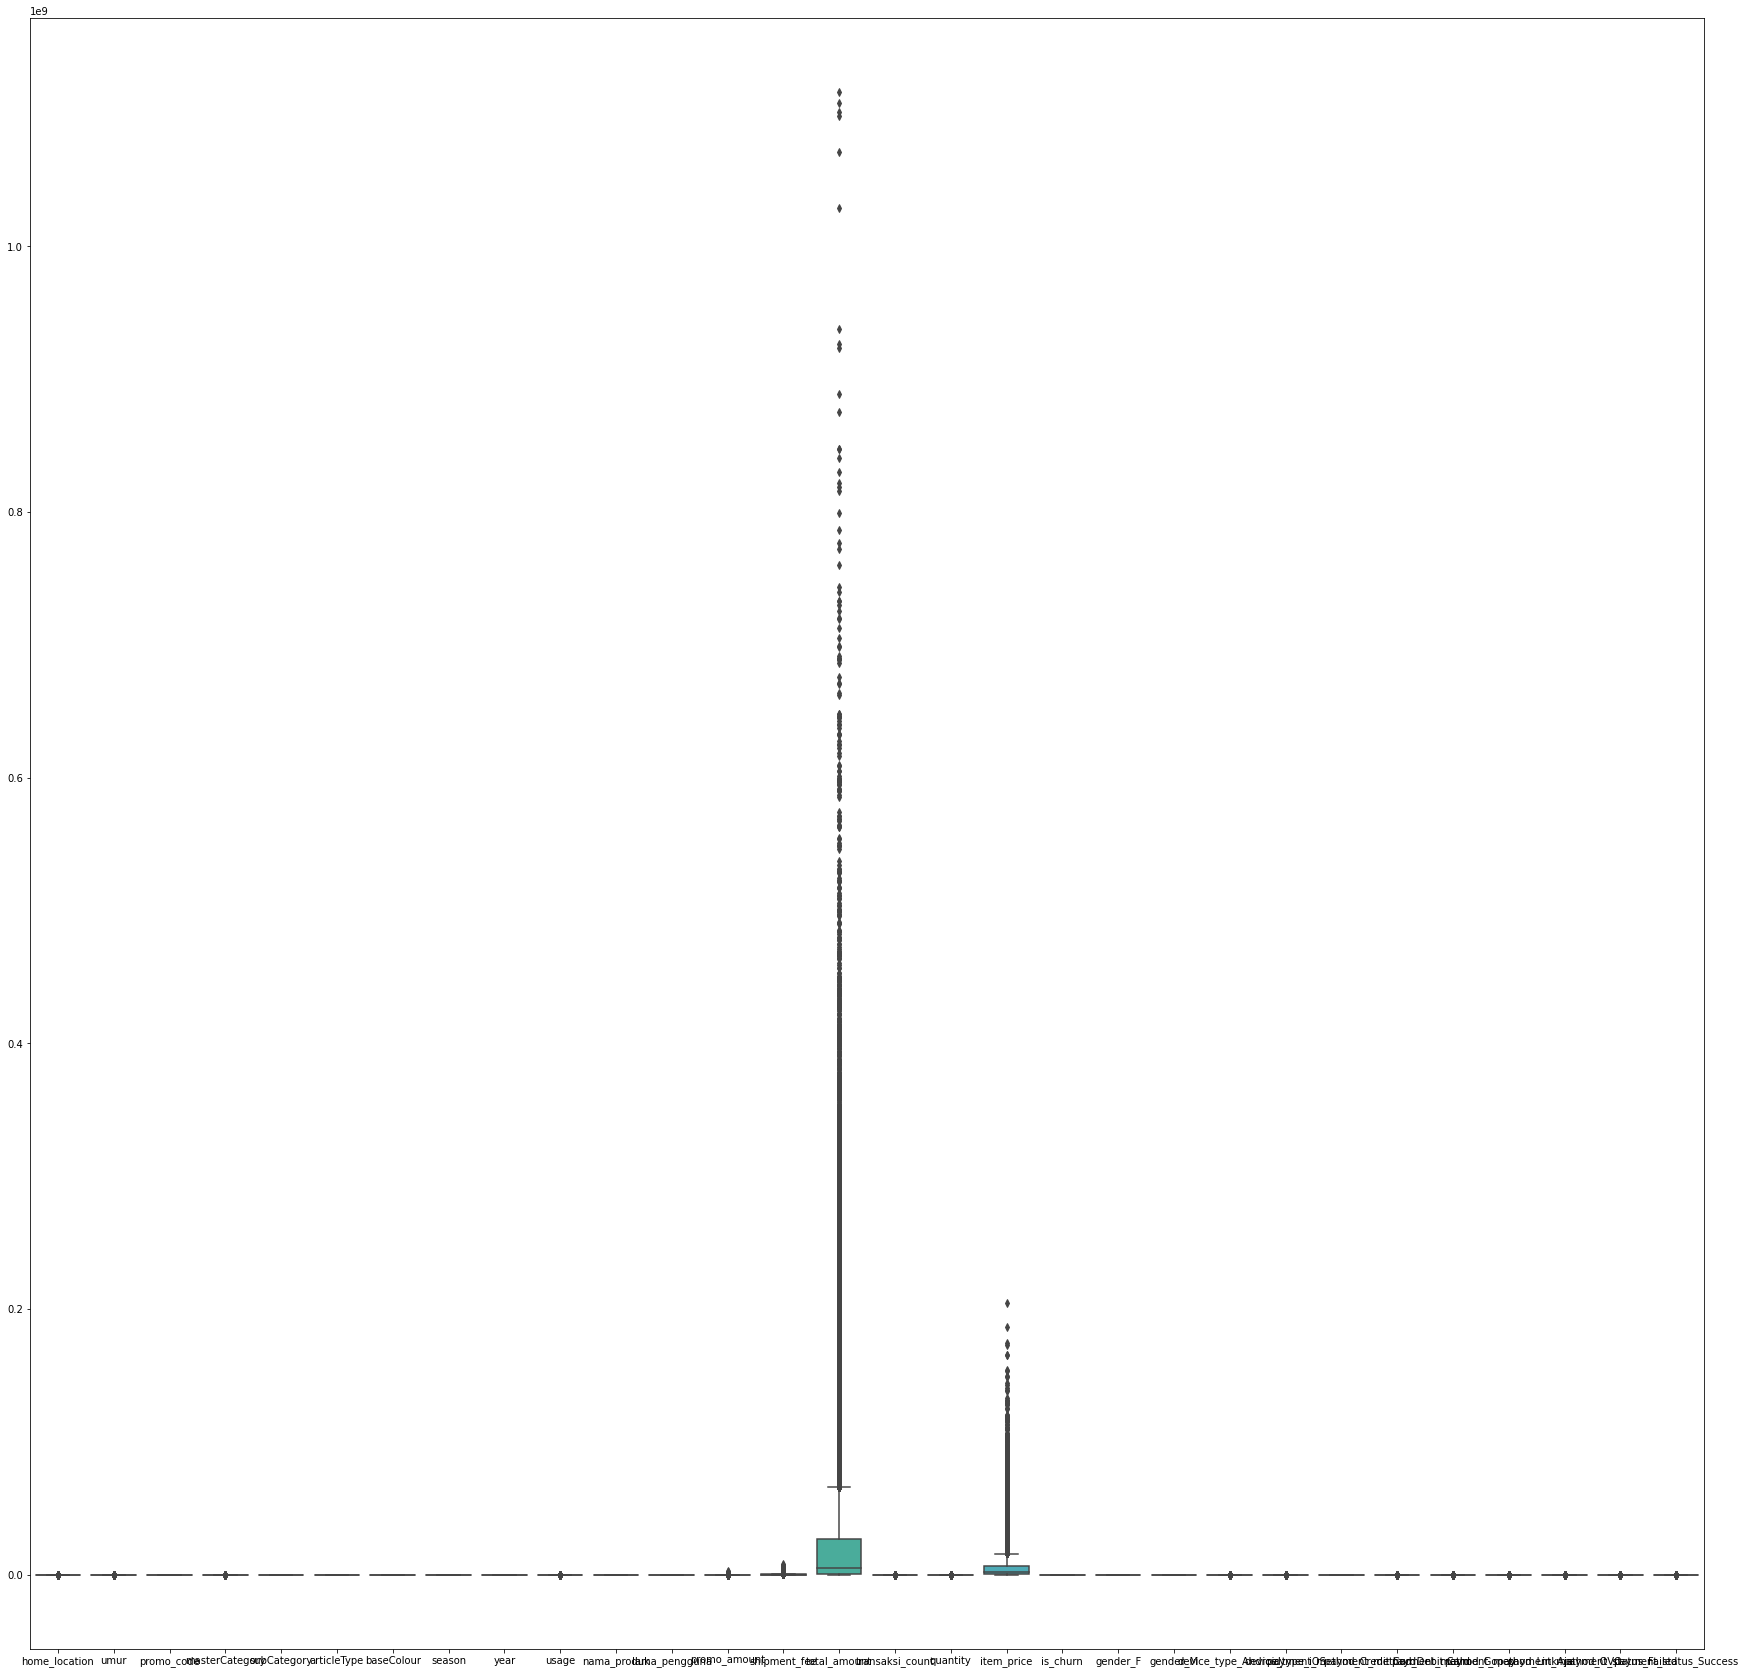

In [ ]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_model)

In [ ]:
# Z-Score
columns = ['umur', 'year', 'lama_pengguna', 'promo_amount', 'shipment_fee', 'total_amount', 'transaksi_count', 'quantity', 'item_price']

for i in columns:
    upper_limit = df_model[i].mean() + 3*df_model[i].std()
    lower_limit = df_model[i].mean() - 3*df_model[i].std()

    df_model[i] = np.where(
        df_model[i]>upper_limit,
        upper_limit,
        np.where(
            df_model[i]<lower_limit,
            lower_limit,
            df_model[i]
        )
    )

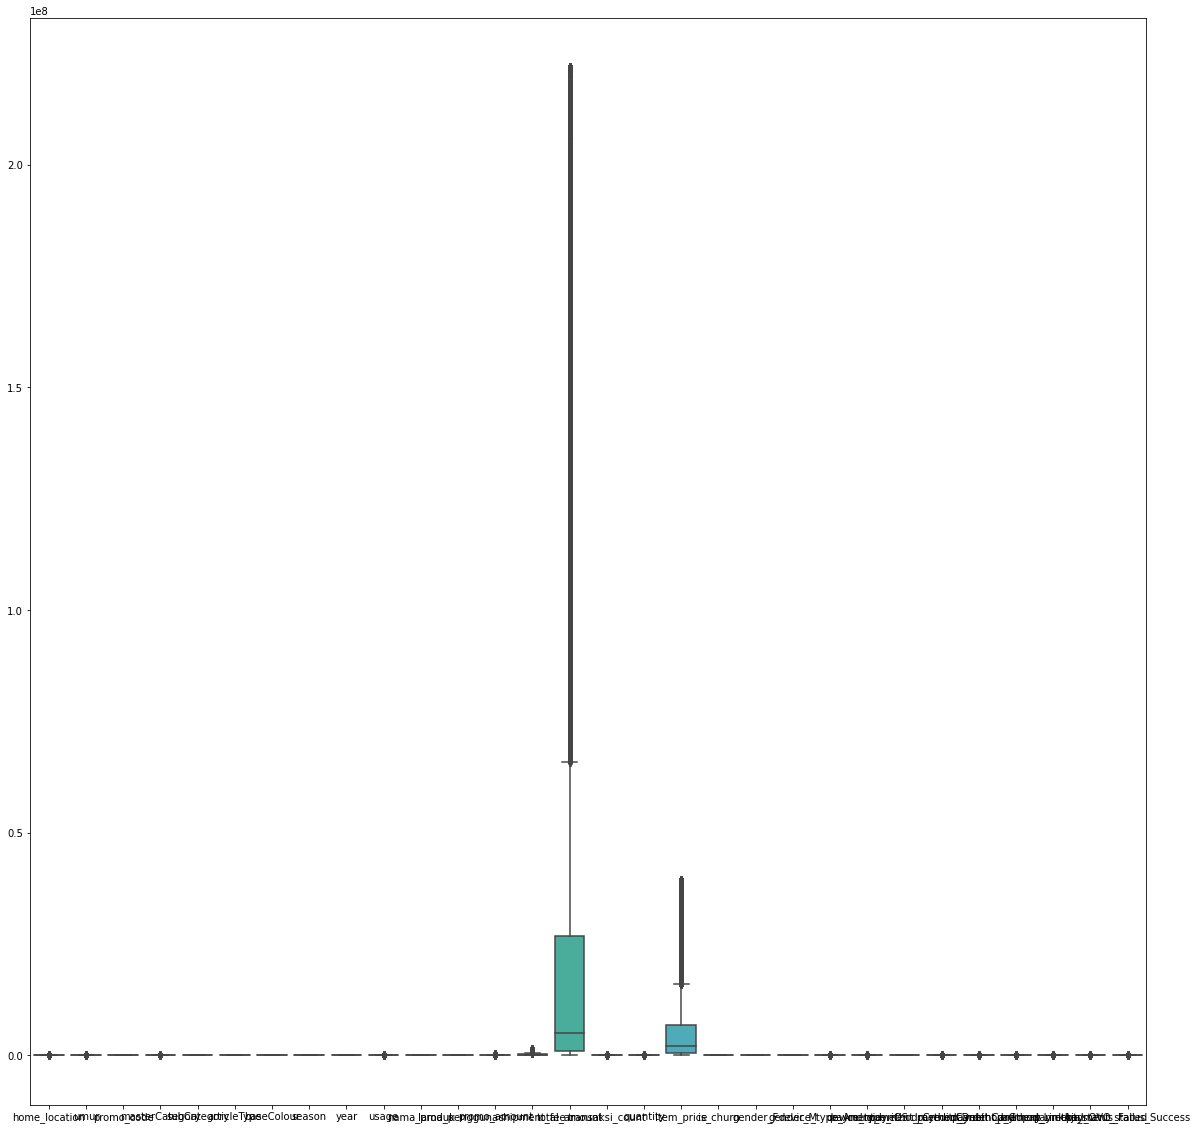

In [ ]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_model)

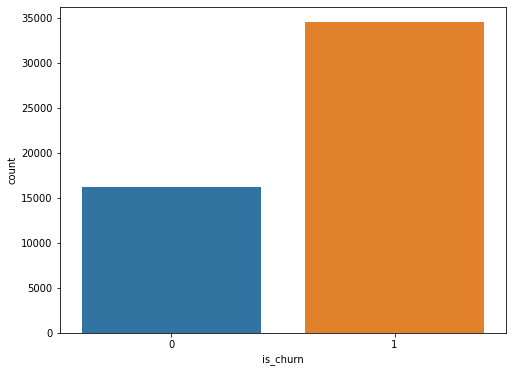

In [ ]:
# Imbalance Data

# Observe imbalance data here
plt.figure(figsize=(8,6))
sns.countplot(df_model.is_churn)

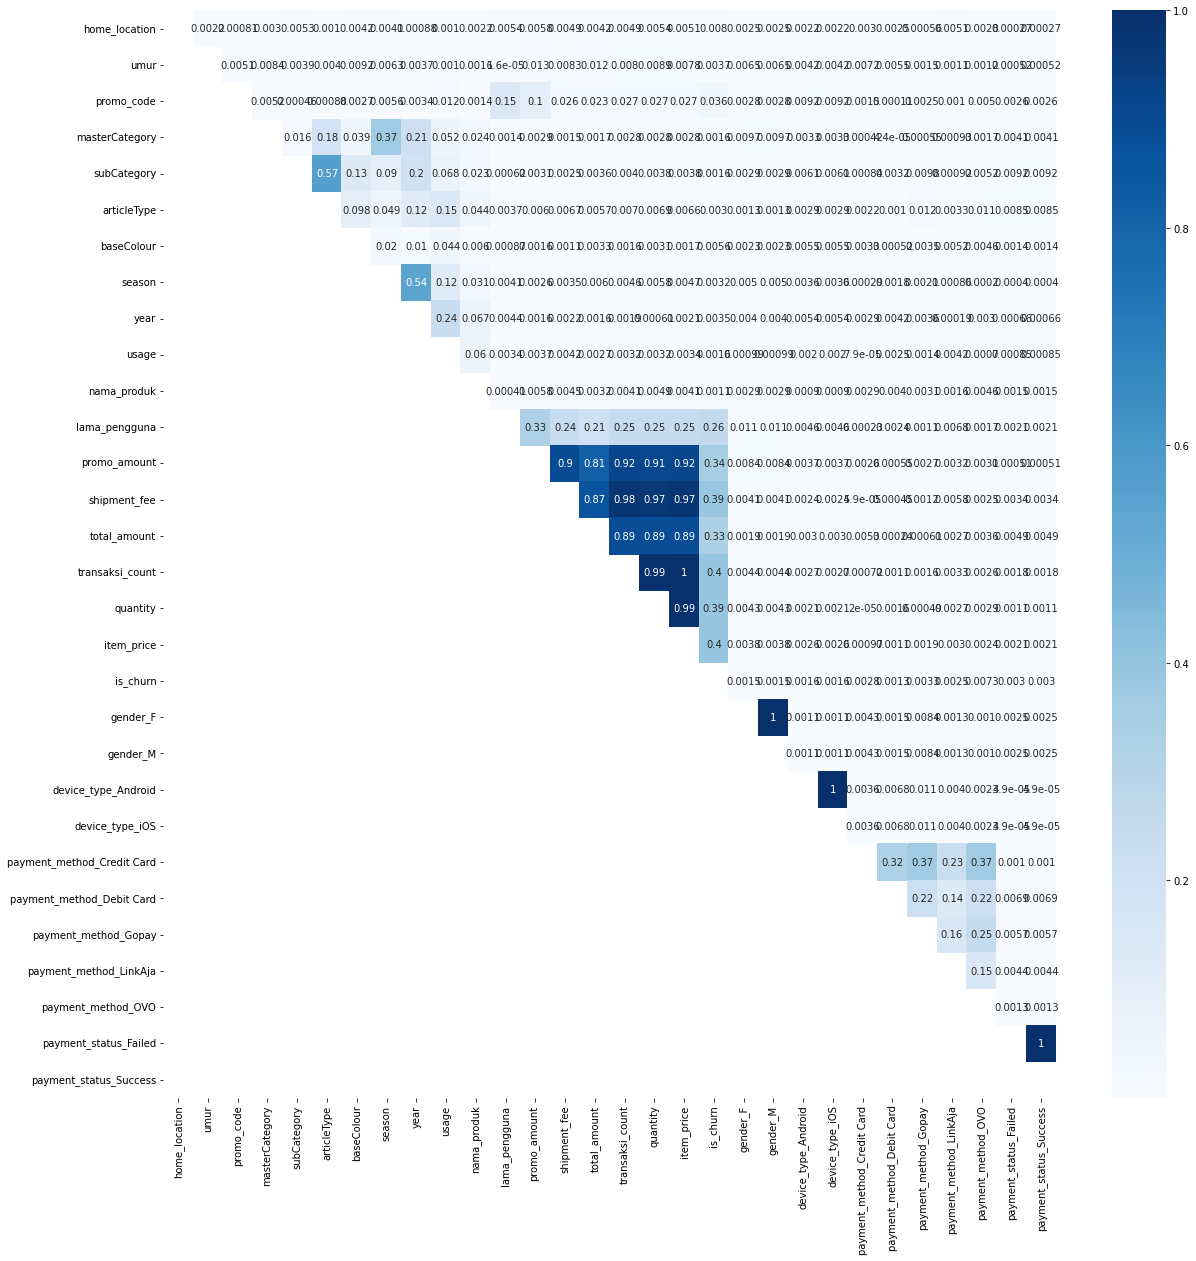

In [ ]:
# Create correlation matrix
corr_matrix = df_model.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

In [ ]:
df_model.drop(columns=['promo_amount', 'shipment_fee', 'total_amount', 'transaksi_count', 'quantity'], inplace=True)

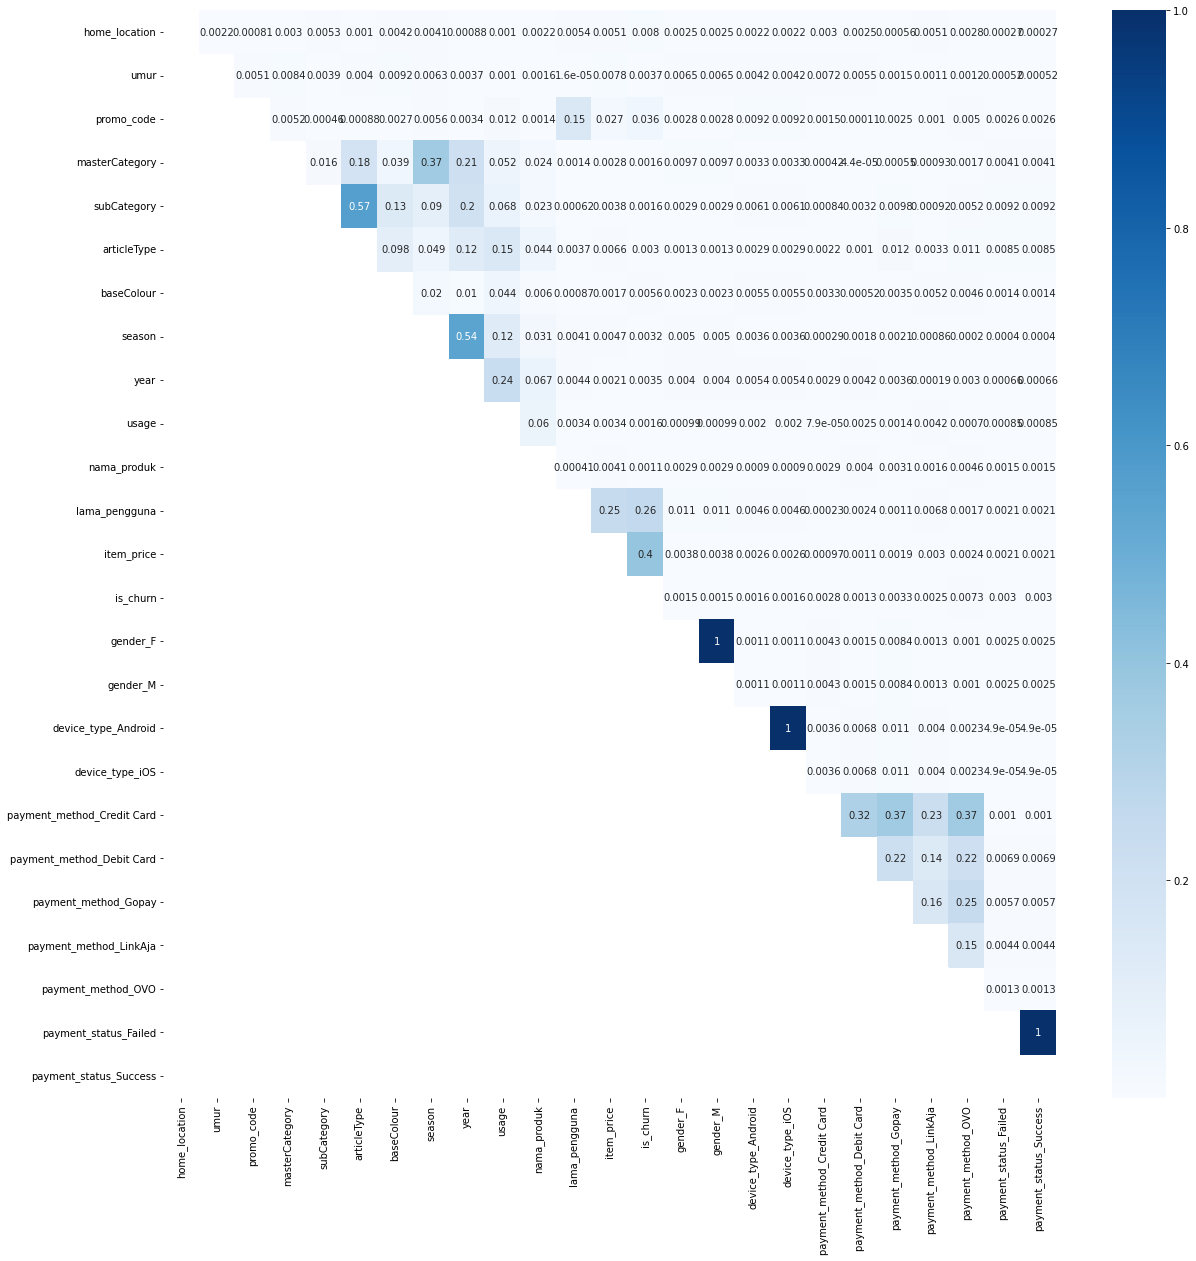

In [ ]:
# Create correlation matrix
corr_matrix = df_model.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

In [ ]:
# Memisahkan mana X dan mana y
y= df_model['is_churn']
X= df_model.drop(['is_churn'],1)
X.head(6)

,home_location,umur,promo_code,masterCategory,subCategory,articleType,baseColour,season,year,usage,...,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success
0,8,31.0,0,2,11,39,33,2,2012.0,0,...,1,1,0,0,1,0,0,0,0,1
1,17,17.0,7,1,18,15,25,3,2016.0,0,...,0,0,1,1,0,0,0,0,0,1
2,6,14.0,0,0,41,138,4,3,2012.0,0,...,0,1,0,0,0,1,0,0,0,1
3,6,29.0,8,0,0,0,2,1,2015.0,2,...,0,1,0,0,0,1,0,0,0,1
4,31,26.0,8,1,21,86,2,3,2017.0,0,...,1,0,1,1,0,0,0,0,0,1
5,12,26.0,8,1,6,127,14,2,2013.0,6,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
50667    1
50668    1
50669    1
50670    1
50671    1
Name: is_churn, Length: 50672, dtype: int64

In [ ]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample (X, y)
y_res.value_counts()

0    34479
1    34479
Name: is_churn, dtype: int64

In [ ]:
# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=50)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (55166, 24) , sedangkan Jumlah baris dan kolom dari y_train adalah: (55166,)
Prosentase Churn di data Training adalah:
0    0.500073
1    0.499927
Name: is_churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (13792, 24) , sedangkan Jumlah baris dan kolom dari y_test adalah: (13792,)
Prosentase Churn di data Testing adalah:
1    0.50029
0    0.49971
Name: is_churn, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, plot_roc_curve
model_score = {'Name': [], 'Accuracy': [],'Precision': [], 'Recall': [], 'F1_score': [], 'Roc_Auc': [], 'CM': []}
model_score = pd.DataFrame(model_score)

def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    #Performance evaluation
    def print_scores(alg, y_test, y_pred):
        print(alg_name)
        auc_score = roc_auc_score(y_test, y_pred)
        print("roc_auc: ",auc_score)
        acc_score = accuracy_score(y_test, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_test, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_test, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_test, y_pred, average='weighted')
        print("f1_score: ",f_score)
        cm = confusion_matrix(y_test, y_pred)
        print("confusion_matrix: ",cm)
        model_score.loc[len(model_score.index)] = [alg_name,acc_score,  pre_score,rec_score, f_score,  auc_score, cm]


    print_scores(alg, y_test, y_pred)
    return model


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = modeling(LogisticRegression, 'LogisticRegression')

LogisticRegression
roc_auc:  0.93185470236443
accuracy:  0.9318445475638051
precision:  0.9475818564133374
recall:  0.9143478260869565
f1_score:  0.9318242519418661
confusion_matrix:  [[6543  349]
 [ 591 6309]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

knn_model = modeling(KNeighborsClassifier, 'KNeighborsClassifier')
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
xgb_model = modeling(XGBClassifier, 'XGBoostClassifier')

KNeighborsClassifier
roc_auc:  0.8800280518475527
accuracy:  0.8800029002320185
precision:  0.9162037771782257
recall:  0.8366666666666667
f1_score:  0.8797791679041352
confusion_matrix:  [[6364  528]
 [1127 5773]]
Naive Bayes Classification
roc_auc:  0.8132440468680343
accuracy:  0.8131525522041764
precision:  0.9576540334533136
recall:  0.6555072463768116
f1_score:  0.8083967167986995
confusion_matrix:  [[6692  200]
 [2377 4523]]
XGBoostClassifier
roc_auc:  0.9500448745447357
accuracy:  0.9500435034802784
precision:  0.9522353283821173
recall:  0.9476811594202899
f1_score:  0.9500432868132375
confusion_matrix:  [[6564  328]
 [ 361 6539]]


In [ ]:
model_score

,Name,Accuracy,Precision,Recall,F1_score,Roc_Auc,CM
0,LogisticRegression,0.931845,0.947582,0.914348,0.931824,0.931855,"[[6543, 349], [591, 6309]]"
1,KNeighborsClassifier,0.880003,0.916204,0.836667,0.879779,0.880028,"[[6364, 528], [1127, 5773]]"
2,Naive Bayes Classification,0.813153,0.957654,0.655507,0.808397,0.813244,"[[6692, 200], [2377, 4523]]"
3,XGBoostClassifier,0.950044,0.952235,0.947681,0.950043,0.950045,"[[6564, 328], [361, 6539]]"


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV#Grid Search
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_class_params = {"learning_rate": [0.1,0.2,0.3,0.4,0.5], 'max_depth': [1,2,3,4,5,6,7,8],
                  'subsample':[1.0,2.0,3.0,4.0]}
grid_xgb_class = GridSearchCV(XGBClassifier(), xgb_class_params, scoring = 'accuracy',cv = StratifiedKFold(n_splits=5), n_jobs=-1)
grid_xgb_class.fit(x_train, y_train)
y_pred = grid_xgb_class.predict(x_test)
best_score = grid_xgb_class.best_score_
best_params = grid_xgb_class.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Accuracy is ', accuracy)
print ('--')
print ('Precision is ', precision)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Best Parameters is {'learning_rate': 0.5, 'max_depth': 3, 'subsample': 1.0}
--
ROC Score is 0.9547521596137509
--
Accuracy is  0.9547563805104409
--
Precision is  0.9482857142857143
--
Recall Score is  0.9620289855072464
--
Confusion Matrix

 [[6530  362]
 [ 262 6638]]


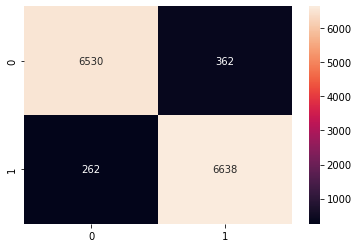

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="g")
plt.show()

In [ ]:
# FEATURE IMPORTANCE
model = XGBClassifier(learning_rate=0.3,max_depth = 3 ,subsample =1.0)
model.fit(x_train,y_train)
ft_imp = model.feature_importances_
sort = np.argsort(ft_imp)[::-1]
ft = df_model.columns

#score feature importance
for i in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (i +1 , 30, ft[sort[i]], ft_imp[sort[i]]))

 1) item_price                     0.309136
 2) lama_pengguna                  0.212256
 3) gender_F                       0.083266
 4) gender_M                       0.055329
 5) device_type_Android            0.041044
 6) payment_method_LinkAja         0.035414
 7) subCategory                    0.034901
 8) payment_method_Debit Card      0.034836
 9) device_type_iOS                0.031638
10) payment_method_Credit Card     0.030009
11) year                           0.020440
12) payment_method_Gopay           0.019792
13) is_churn                       0.019515
14) payment_status_Failed          0.016909
15) promo_code                     0.015343
16) season                         0.007322
17) baseColour                     0.006302
18) articleType                    0.004822
19) nama_produk                    0.004550
20) masterCategory                 0.004282
21) umur                           0.004264
22) usage                          0.003477
23) home_location               